In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import importlib
import h5py
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")

In [7]:
areas = ['V1', 'LM', 'RL', 'AL',  'PM', 'AM']

# load anatomical data

In [48]:
path_anatomy = '/Users/xiaoxuanj/work/work_allen/Ephys/processed_data/anatomical_hierarchy/AnatomicalHierarchyFiles/'


In [23]:
data = np.load(path_anatomy+'hscorediff_Cortex_correct.npy')

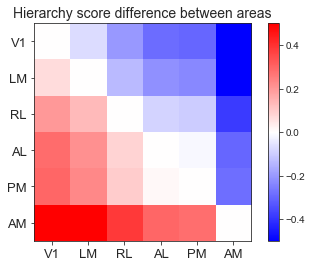

In [25]:
plt.imshow(data, cmap='bwr', vmax=0.5, vmin=-0.5)
plt.xticks(range(6),areas, fontsize=13)
plt.yticks(range(6),areas, fontsize=13)
plt.colorbar()
plt.title('Hierarchy score difference between areas', fontsize=14)
#plt.savefig(path_anatomy+'tmp.pdf')
plt.savefig('/Users/xiaoxuanj/work/work_allen/Ephys/figures/platform_paper/functional_connectivity/anatomical.pdf')


# load functional data

In [31]:
path_function = '/Users/xiaoxuanj/work/work_allen/Ephys/processed_data/adjacency_matrix/'
#data_f = np.load(path_function+'ccg_peak_offset_tmp20190709_limit20ms.npy')


In [49]:
#[data_f, N_connection] = np.load(path_function+'FC_paper090419.npy')
[COUNT, CCG_amp, data_f] = np.load(path_function+'FC_area_27mice_710std_resorted_high.npy')

In [50]:
data_f

array([[ 0.        , -2.43333333, -0.31818182, -3.38235294, -3.38888889,
        -5.71428571],
       [ 2.66666667,  0.02272727,  2.31818182,  0.03333333, -1.75      ,
        -3.8       ],
       [ 0.5       , -1.29166667,  0.        , -3.91666667, -3.83333333,
        -1.25      ],
       [ 3.3125    ,  0.16666667,  4.08333333,  0.02272727, -0.4375    ,
        -2.25      ],
       [ 3.77777778,  2.44444444,  4.16666667,  0.3125    ,  0.        ,
        -1.125     ],
       [ 6.4375    ,  2.81818182,  1.95      ,  2.57142857,  1.5       ,
         0.02083333]])

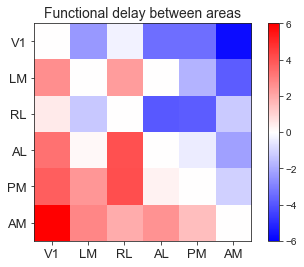

In [52]:
plt.imshow(data_f, cmap='bwr', vmax=6, vmin=-6)
plt.xticks(range(6),areas, fontsize=13)
plt.yticks(range(6),areas, fontsize=13)
plt.colorbar()
plt.title('Functional delay between areas', fontsize=14)
plt.savefig('/Users/xiaoxuanj/work/work_allen/Ephys/figures/platform_paper/functional_connectivity/functional2.pdf')


In [53]:
np.corrcoef(data.flatten(), data_f.flatten())

array([[1.        , 0.79735165],
       [0.79735165, 1.        ]])

In [54]:
from scipy.stats import pearsonr
pearsonr(data.flatten(), data_f.flatten())

(0.7973516541781345, 5.862484735233008e-09)

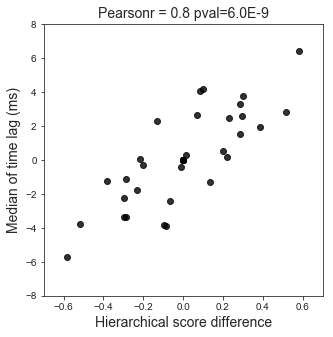

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(data.flatten(), data_f.flatten(), c='k', alpha=0.8)
plt.xlim([-0.7, 0.7])
plt.ylim([-8,8])
plt.title('Pearsonr = '+str(0.80)+' pval=6.0E-9', fontsize=14)
plt.xlabel('Hierarchical score difference', fontsize=14)
plt.ylabel('Median of time lag (ms)', fontsize=14)
#plt.savefig(path_anatomy+'mice27_6area_7std10ms_resorted_anatomy_function_corr.pdf')
plt.savefig('/Users/xiaoxuanj/work/work_allen/Ephys/figures/platform_paper/functional_connectivity/anatomy_function_corr.pdf')


Text(0,0.5,'Target')

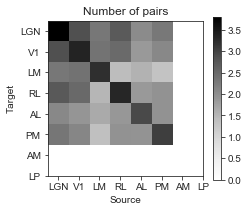

In [47]:
area_names = ['LGN', 'V1', 'LM','RL', 'AL',  'PM', 'AM', 'LP']
#area_names = ['V1', 'LM', 'RL','AL',  'PM', 'AM']
plt.figure(figsize=(16,3))
plt.subplot(141)
plt.imshow(np.log10(N_connection), cmap='Greys', vmin=0)
plt.xticks(range(8), area_names)
plt.yticks(range(8), area_names)
plt.title('Number of pairs')
plt.colorbar()
plt.xlabel('Source')
plt.ylabel('Target')
#plt.savefig('/Users/xiaoxuanj/work/work_allen/Ephys/figures/platform_paper/functional_connectivity/FC_mice27_8area_number.pdf')
